In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn import metrics
from scipy.optimize import minimize

from sklearn import set_config
import seaborn as sns
set_config("diagram")
from sklearn.tree import export_text
from sklearn.tree import plot_tree

## Data Exploration (Preprocessing)

In [42]:
df = sns.load_dataset('iris').dropna()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [44]:
df.shape

(150, 5)

In [46]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Data Visualization

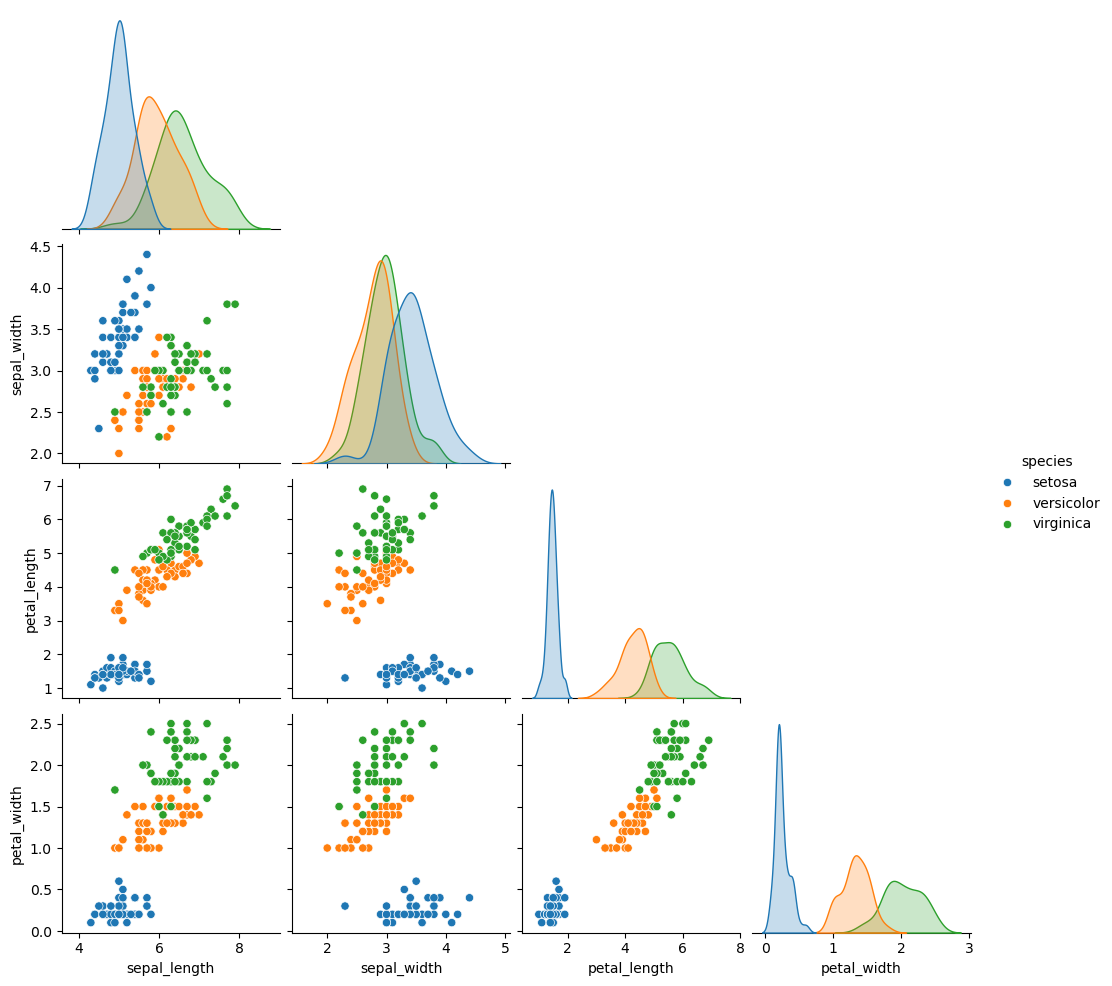

In [49]:
#Pairwise plot
sns.pairplot(data = df, hue = 'species', corner=True)
plt.savefig('D:/PythonProject/Pictures/iris_pairplot.png', dpi = 300)

## Fit the model and Evaluate

In [51]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
# df['target'] = (df['target'] > 0).astype(int)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


D:\Software\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Software\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Software\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


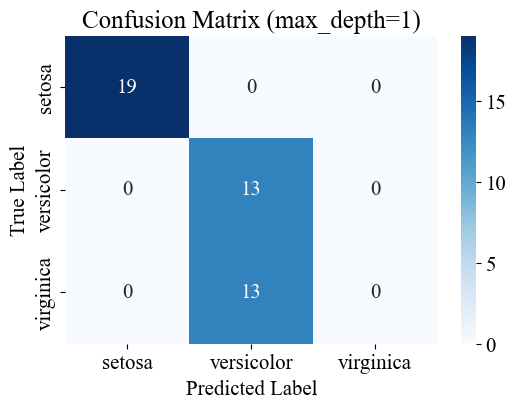

D:\Software\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Software\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Software\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.50      1.00      0.67        13
           2       0.00      0.00      0.00        13

    accuracy                           0.71        45
   macro avg       0.50      0.67      0.56        45
weighted avg       0.57      0.71      0.61        45



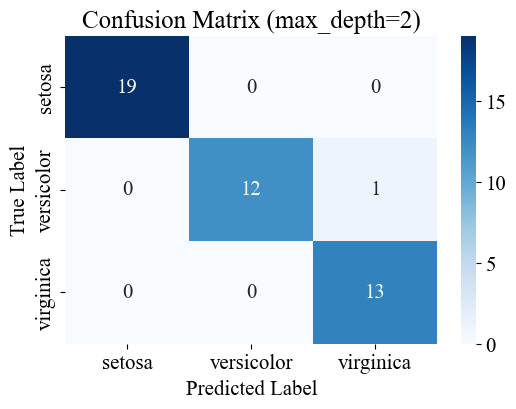

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



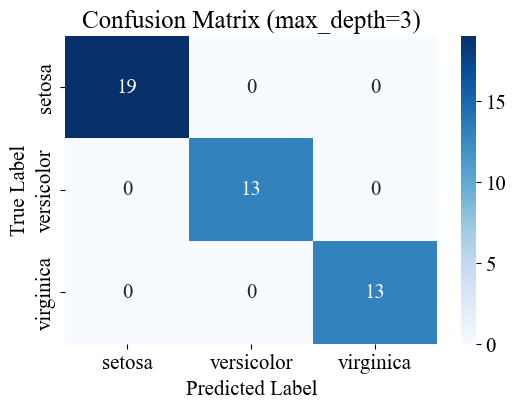

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



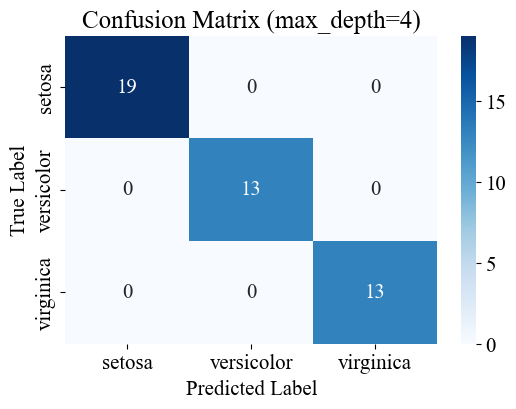

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



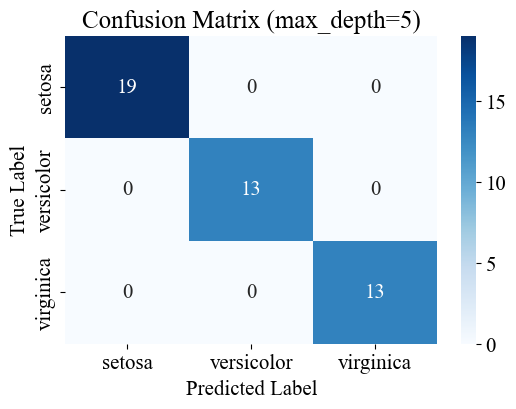

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



,max_depth,precision_0,precision_1,precision_2,recall_0,recall_1,recall_2,f1_0,f1_1,f1_2,precision_macro,recall_macro,f1_macro,precision_weighted,recall_weighted,f1_weighted,precision_micro,recall_micro,f1_micro
0,1,1.0,0.5,0.000000,1.0,1.000000,0.0,1.0,0.666667,0.000000,0.50000,0.666667,0.555556,0.566667,0.711111,0.614815,0.711111,0.711111,0.711111
1,2,1.0,1.0,0.928571,1.0,0.923077,1.0,1.0,0.960000,0.962963,0.97619,0.974359,0.974321,0.979365,0.977778,0.977745,0.977778,0.977778,0.977778
2,3,1.0,1.0,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,4,1.0,1.0,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,5,1.0,1.0,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [106]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df['target'], test_size=0.3, random_state=42)
results = []
for depth in range(1, 6):
    clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=5, min_samples_leaf=2, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Compute evaluation metrics
    precision = precision_score(y_test, y_pred, average=None)
    recall = recall_score(y_test, y_pred, average=None)
    f1 = f1_score(y_test, y_pred, average=None)

    results.append({
        'max_depth': depth,
        'precision_0': precision[0], 'precision_1': precision[1], 'precision_2': precision[2],
        'recall_0': recall[0], 'recall_1': recall[1], 'recall_2': recall[2],
        'f1_0': f1[0], 'f1_1': f1[1], 'f1_2': f1[2],
        'precision_macro': precision_score(y_test, y_pred, average='macro'),
        'recall_macro': recall_score(y_test, y_pred, average='macro'),
        'f1_macro': f1_score(y_test, y_pred, average='macro'),
        'precision_weighted': precision_score(y_test, y_pred, average='weighted'),
        'recall_weighted': recall_score(y_test, y_pred, average='weighted'),
        'f1_weighted': f1_score(y_test, y_pred, average='weighted'),
        'precision_micro': precision_score(y_test, y_pred, average='micro'),
        'recall_micro': recall_score(y_test, y_pred, average='micro'),
        'f1_micro': f1_score(y_test, y_pred, average='micro'),
    })

     
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix (max_depth={depth})")
    plt.savefig(f"D:/PythonProject/Pictures/confusion_matrix_depth_{depth}.png", dpi=300, bbox_inches="tight")
    plt.show()
    print(classification_report(y_test, y_pred))

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df


In [74]:
# print feature importances
print(dict(zip(X_train.columns, clf.feature_importances_)))

{'sepal length (cm)': 0.014210684863328554, 'sepal width (cm)': 0.0, 'petal length (cm)': 0.9226406541547046, 'petal width (cm)': 0.06314866098196682}


In [76]:
tree = export_text(clf, feature_names = list(X_train.columns))
print(tree)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- sepal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- sepal length (cm) >  4.95
|   |   |   |--- class: 1
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- class: 2
|   |   |   |--- petal length (cm) >  4.85
|   |   |   |   |--- class: 2



## Plot the Tree

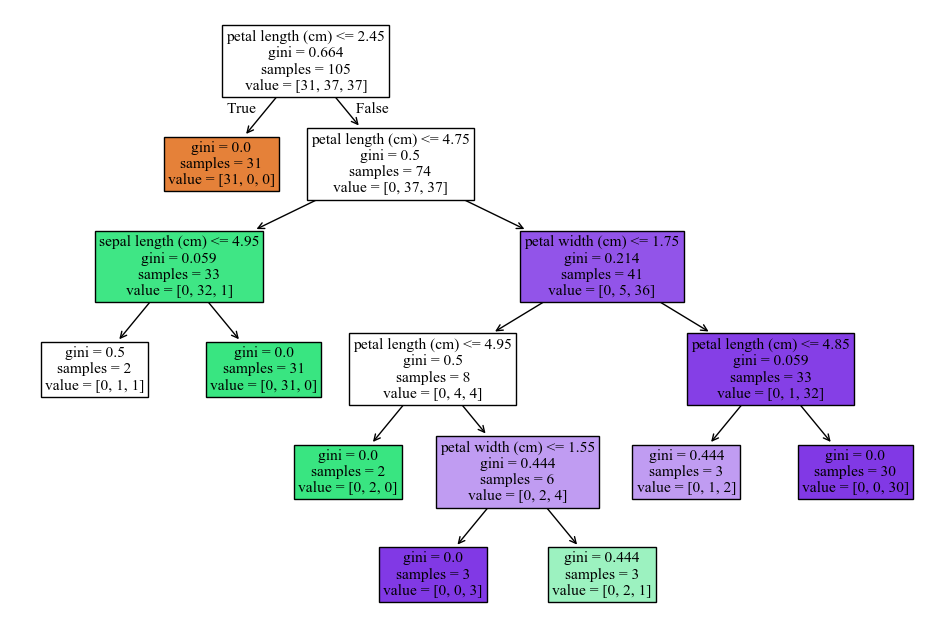

In [98]:
#plot tree
plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(12, 8))
treePlot = plot_tree(clf, feature_names=list(X_train.columns), filled = True)
treePlot;
plt.savefig('D:/PythonProject/Pictures/iris_treeplot2.png', dpi = 300)